In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import wrangle as w

In [2]:
zillow = w.wrangle_zillow(remove=False)

In [3]:
zillow.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


## 1.Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [17]:
normal_cols = ['bedrooms','bathrooms','year_built']
log_cols = ['square_feet','taxamount']

In [5]:
zillow_scaled = zillow.copy()

In [6]:
minmax_scaler = pre.MinMaxScaler()
zillow_scaled[['bedrooms_minmax','bathrooms_minmax', 'year_built_minmax']] = minmax_scaler.fit_transform(zillow[normal_cols])

standard_scaler = pre.StandardScaler()
zillow_scaled[['bedrooms_standard','bathrooms_standard', 'year_built_standard']] = standard_scaler.fit_transform(zillow[normal_cols])

robust_scaler = pre.RobustScaler()
zillow_scaled[['bedrooms_robust','bathrooms_robust', 'year_built_robust']] = robust_scaler.fit_transform(zillow[normal_cols])



## Vizualize

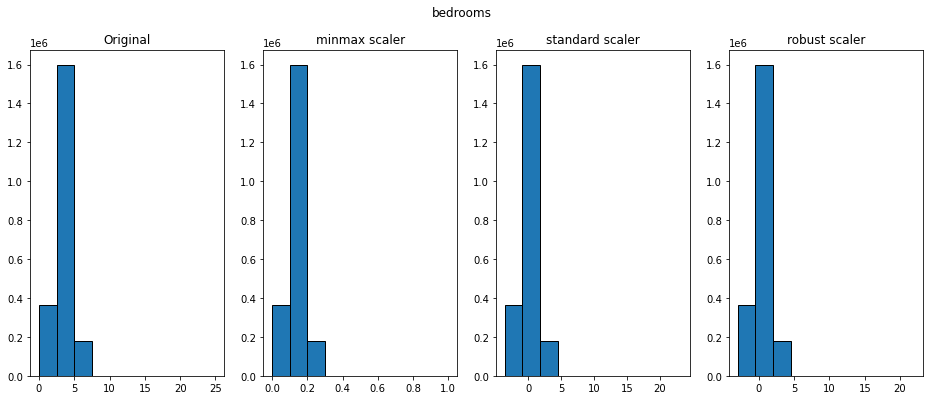

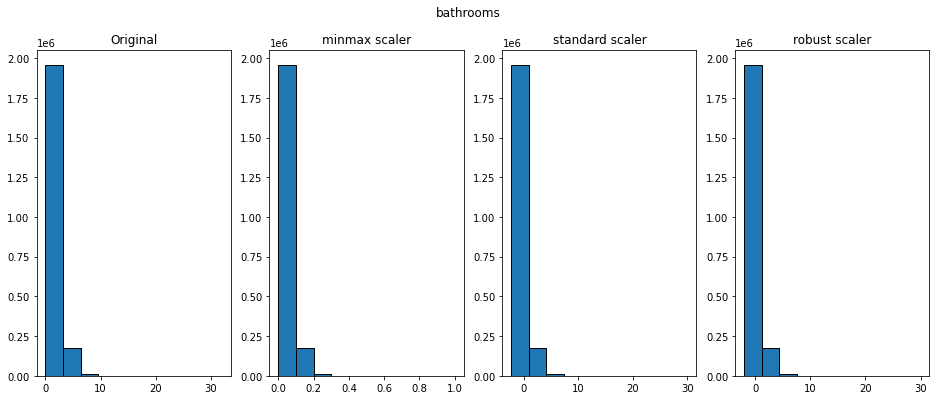

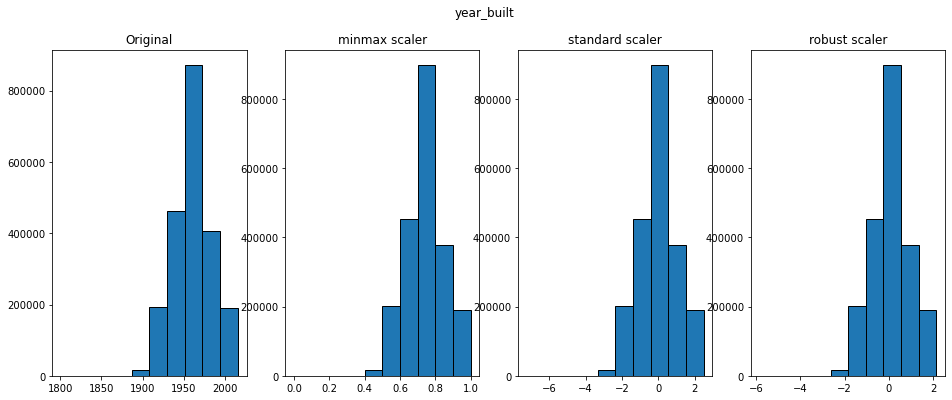

In [7]:
for col in normal_cols:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(zillow_scaled[col], ec='black')
    ax1.set_title('Original')

    ax2.hist(zillow_scaled[f'{col}_minmax'], ec='black')
    ax2.set_title('minmax scaler')

    ax3.hist(zillow_scaled[f'{col}_standard'], ec='black')
    ax3.set_title('standard scaler')

    ax4.hist(zillow_scaled[f'{col}_robust'], ec='black')
    ax4.set_title('robust scaler')

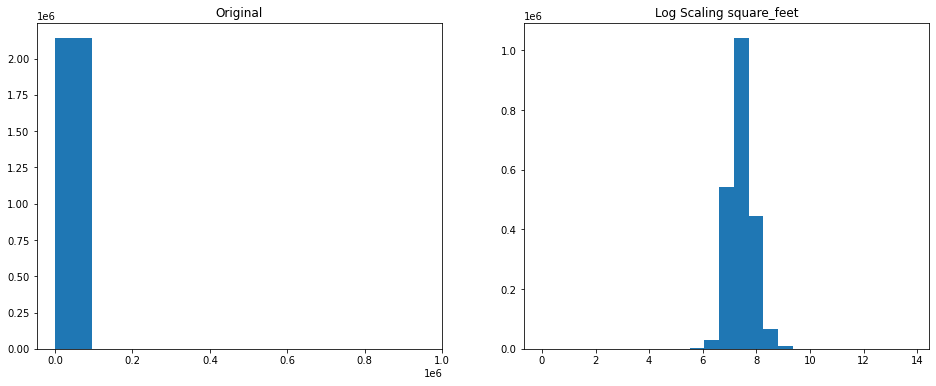

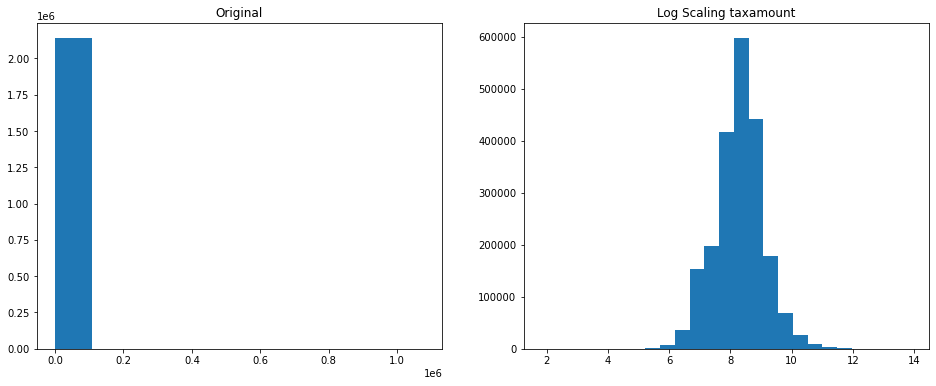

In [8]:
for col in log_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.hist(zillow_scaled[col])
    ax1.set_title('Original')
    ax2.hist(np.log(zillow_scaled[col]), bins = 25)
    ax2.set_title(f'Log Scaling {col}')
    plt.show()

## 2. Apply the ```.inverse_transform``` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [9]:
zillow_scaled[['bedrooms_minmax_inverse','bathrooms_minmax_inverse', 'year_built_minmax_inverse']] = minmax_scaler.fit_transform(zillow[normal_cols])
zillow_scaled[['bedrooms_standard_inverse','bathrooms_standard_inverse', 'year_built_standard_inverse']] = standard_scaler.fit_transform(zillow[normal_cols])
zillow_scaled[['bedrooms_robust_inverse','bathrooms_robust_inverse', 'year_built_robust_inverse']] = robust_scaler.inverse_transform(zillow[normal_cols])

zillow_scaled.head()



,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips,bedrooms_minmax,bathrooms_minmax,year_built_minmax,...,year_built_robust,bedrooms_minmax_inverse,bathrooms_minmax_inverse,year_built_minmax_inverse,bedrooms_standard_inverse,bathrooms_standard_inverse,year_built_standard_inverse,bedrooms_robust_inverse,bathrooms_robust_inverse,year_built_robust_inverse
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,0.16,0.0625,0.948837,...,1.740741,0.16,0.0625,0.948837,0.749068,-0.242646,1.987871,7.0,4.0,56093.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,0.12,0.1250,0.976744,...,1.962963,0.12,0.1250,0.976744,-0.323203,1.776437,2.258745,6.0,6.0,56255.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,0.12,0.0625,0.581395,...,-1.185185,0.12,0.0625,0.581395,-0.323203,-0.242646,-1.578630,6.0,4.0,53960.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,0.00,0.0000,0.795349,...,0.518519,0.00,0.0000,0.795349,-3.540018,-2.261729,0.498067,3.0,2.0,55202.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,0.00,0.0000,0.800000,...,0.555556,0.00,0.0000,0.800000,-3.540018,-2.261729,0.543212,3.0,2.0,55229.0


**Returns weird data...***

## 3. Read the documentation for sklearn's ```QuantileTransformer```. Use normal for the ```output_distribution``` and apply this scaler to your data. Visualize the result of your data scaling.

In [12]:
zillow_scaled2 = zillow.copy()

In [13]:
quantile = pre.QuantileTransformer(output_distribution='normal')

In [19]:
zillow_scaled2[['bedrooms_quantile','bathrooms_quantile', 'year_built_quantile']] = quantile.fit_transform(zillow[normal_cols])



In [20]:
zillow_scaled2.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips,bedrooms_quantile,bathrooms_quantile,year_built_quantile
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,0.729877,-0.176553,1.942703
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,-0.265284,1.606755,2.386340
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,-0.265284,-0.176553,-1.439001
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,-5.199338,-5.199338,0.567211
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,-5.199338,-5.199338,0.605955


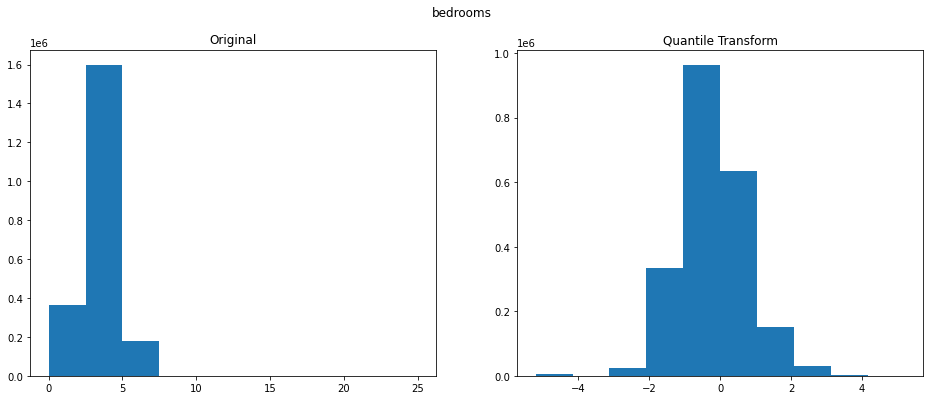

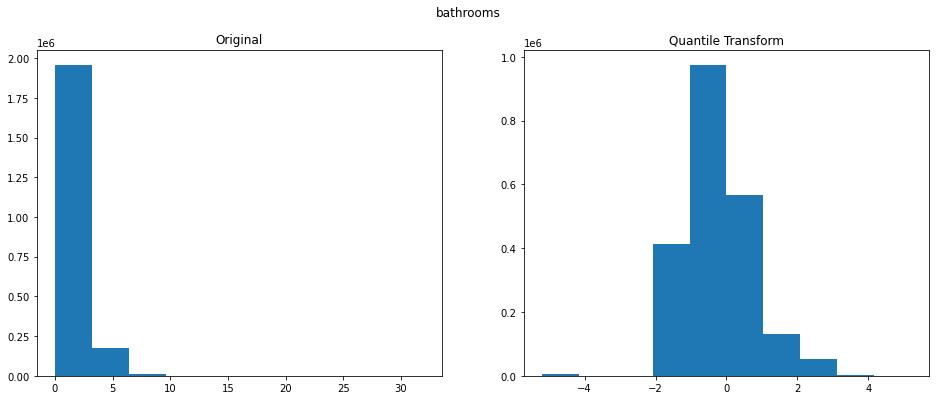

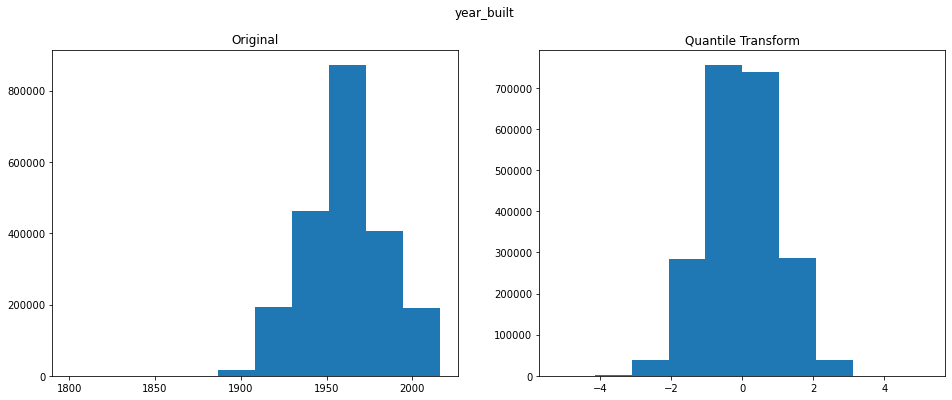

In [22]:
for col in normal_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(zillow_scaled2[col])
    ax1.set_title('Original')
    ax2.hist(zillow_scaled2[f'{col}_quantile'])
    ax2.set_title(f'Quantile Transform')
    plt.show()

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [23]:
quantile1 = pre.QuantileTransformer()

In [24]:
zillow_scaled2[['bedrooms_quantile1','bathrooms_quantile1', 'year_built_quantile1']] = quantile1.fit_transform(zillow[normal_cols])



In [25]:
zillow_scaled2.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips,bedrooms_quantile,bathrooms_quantile,year_built_quantile,bedrooms_quantile1,bathrooms_quantile1,year_built_quantile1
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,0.729877,-0.176553,1.942703,0.766767,0.431431,0.972973
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,-0.265284,1.606755,2.386340,0.393393,0.945946,0.991491
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,-0.265284,-0.176553,-1.439001,0.393393,0.431431,0.075576
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,-5.199338,-5.199338,0.567211,0.000000,0.000000,0.711712
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,-5.199338,-5.199338,0.605955,0.000000,0.000000,0.724224


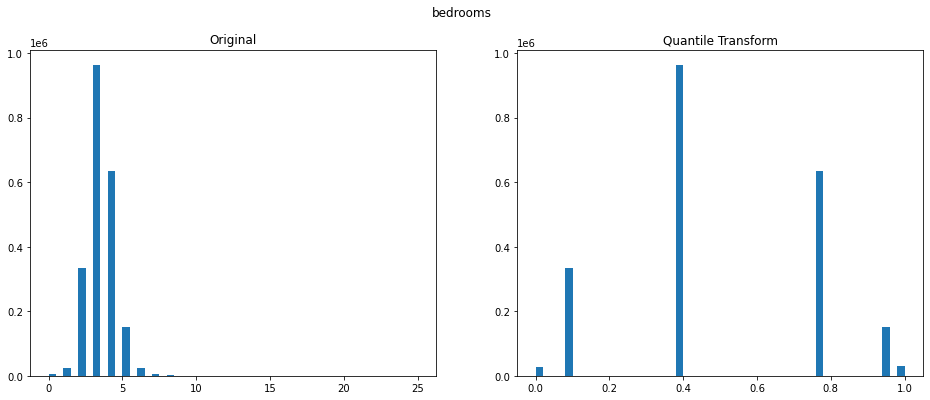

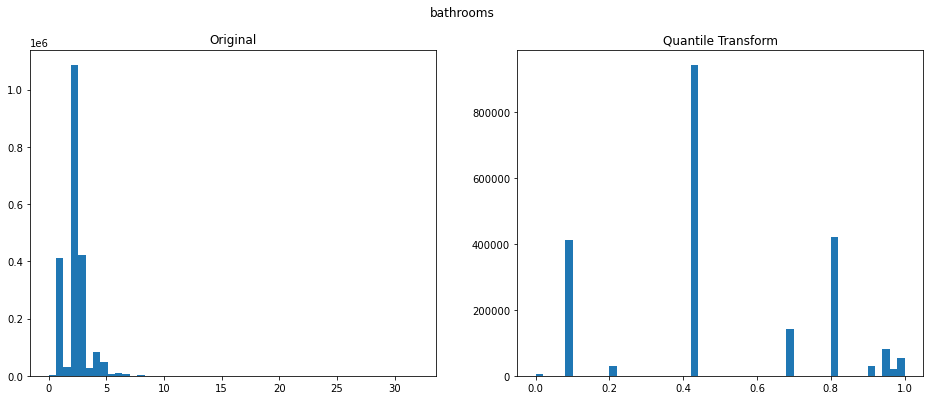

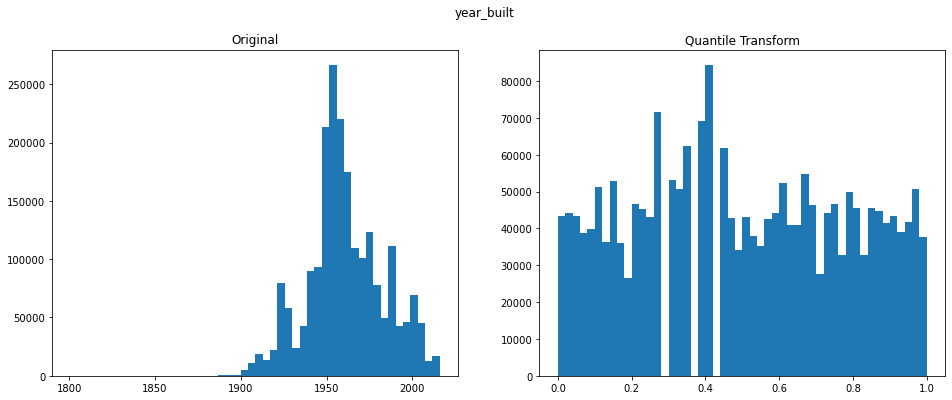

In [27]:
for col in normal_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(zillow_scaled2[col], bins=50)
    ax1.set_title('Original')
    ax2.hist(zillow_scaled2[f'{col}_quantile1'], bins=50)
    ax2.set_title(f'Quantile Transform')
    plt.show()

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your ```prepare.py``` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!